DMF

Aproximate error rate at iteration 0 is 69.0 %
Aproximate error rate at iteration 100 is 26.0 %
Aproximate error rate at iteration 200 is 21.0 %
Aproximate error rate at iteration 300 is 13.0 %
Aproximate error rate at iteration 400 is 14.000000000000002 %
Aproximate error rate at iteration 500 is 8.0 %
Aproximate error rate at iteration 600 is 7.000000000000001 %
Aproximate error rate at iteration 700 is 1.0 %
Aproximate error rate at iteration 800 is 4.0 %
Aproximate error rate at iteration 900 is 3.0 %
Total training time: 923.63 seconds
Aproximate Final training error is 3.5999999999999996 %
Test error is 11.049107142857142 %


In [118]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [130]:
eval_data_dmf = np.load("tmp/DMF/eval_data_dmf.npy")
Activations1 = np.load("tmp/DMF/ActivationsDMF_Layer1.npy")
Activations2 = np.load("tmp/DMF/ActivationsDMF_Layer2.npy")
Activations3 = np.load("tmp/DMF/ActivationsDMF_Layer3.npy")

best1 = np.load("tmp/DMF/BestImagesDMF_Layer1.npy")
best2 = np.load("tmp/DMF/BestImagesDMF_Layer2.npy")
best3 = np.load("tmp/DMF/BestImagesDMF_Layer3.npy")

filters1 = np.load("tmp/DMF/RandomFiltersIndex_Layer1.npy")
filters2 = np.load("tmp/DMF/RandomFiltersIndex_Layer2.npy")
filters3 = np.load("tmp/DMF/RandomFiltersIndex_Layer3.npy")

weight1 = np.load("tmp/DMF/WeightDMF_1.npy")
weight2 = np.load("tmp/DMF/WeightDMF_2.npy")
weight3 = np.load("tmp/DMF/WeightDMF_3.npy")


print("Data:", eval_data_dmf.shape)
print("\n")
print("First layer activations", Activations1.shape)
print("Filter indexes:", filters1)
print("Weight 1 shape:", weight1.shape)
#print(best1)
print("\n")
print("Second layer activations",Activations2.shape)
#print(best2)
print("Filter indexes:", filters2)
print("Weight 2 shape:", weight2.shape)
print("\n")
print("Third layer activations",Activations3.shape)
#print(best3) 
print("Filter indexes:", filters3)
print("Weight 3 shape:", weight3.shape)

Data: (100, 128, 128, 3)


First layer activations (9, 10, 128, 128, 3)
Filter indexes: [19 22 30 20  0 17  3  9 16]
Weight 1 shape: (3, 3, 3, 32)


Second layer activations (9, 10, 128, 128, 3)
Filter indexes: [20 24 17 31 18 29  9 16 13]
Weight 2 shape: (3, 3, 32, 32)


Third layer activations (9, 10, 128, 128, 3)
Filter indexes: [26 19 20 18  9 14 27  4 16]
Weight 3 shape: (3, 3, 32, 64)


In [106]:
#Inspect

inspect = np.linalg.norm(Activations1, axis = (0,1))
inspect = np.linalg.norm(inspect, axis = (0,1))
print(inspect.shape)
print(np.round(inspect,2))

(3,)
[ 15.11  87.05  85.39]


In [107]:
print(np.max(eval_data_dmf[0,]*255))

255.0


In [108]:
Norm1 = np.linalg.norm(Activations1, axis = (3,4))
Norm1 = np.linalg.norm(Norm1, axis = (1,2))
print(Norm1.shape)

(9,)


In [109]:
print("Activations by Node:")
print(Norm1)

Activations by Node:
[  0.65100983  47.0125877    2.68444663   5.27155884  90.95219093
  65.98941663   0.88859026   9.4603125   11.62115907]


In [110]:
print(np.argsort(Norm1))

[0 6 2 3 7 8 1 5 4]


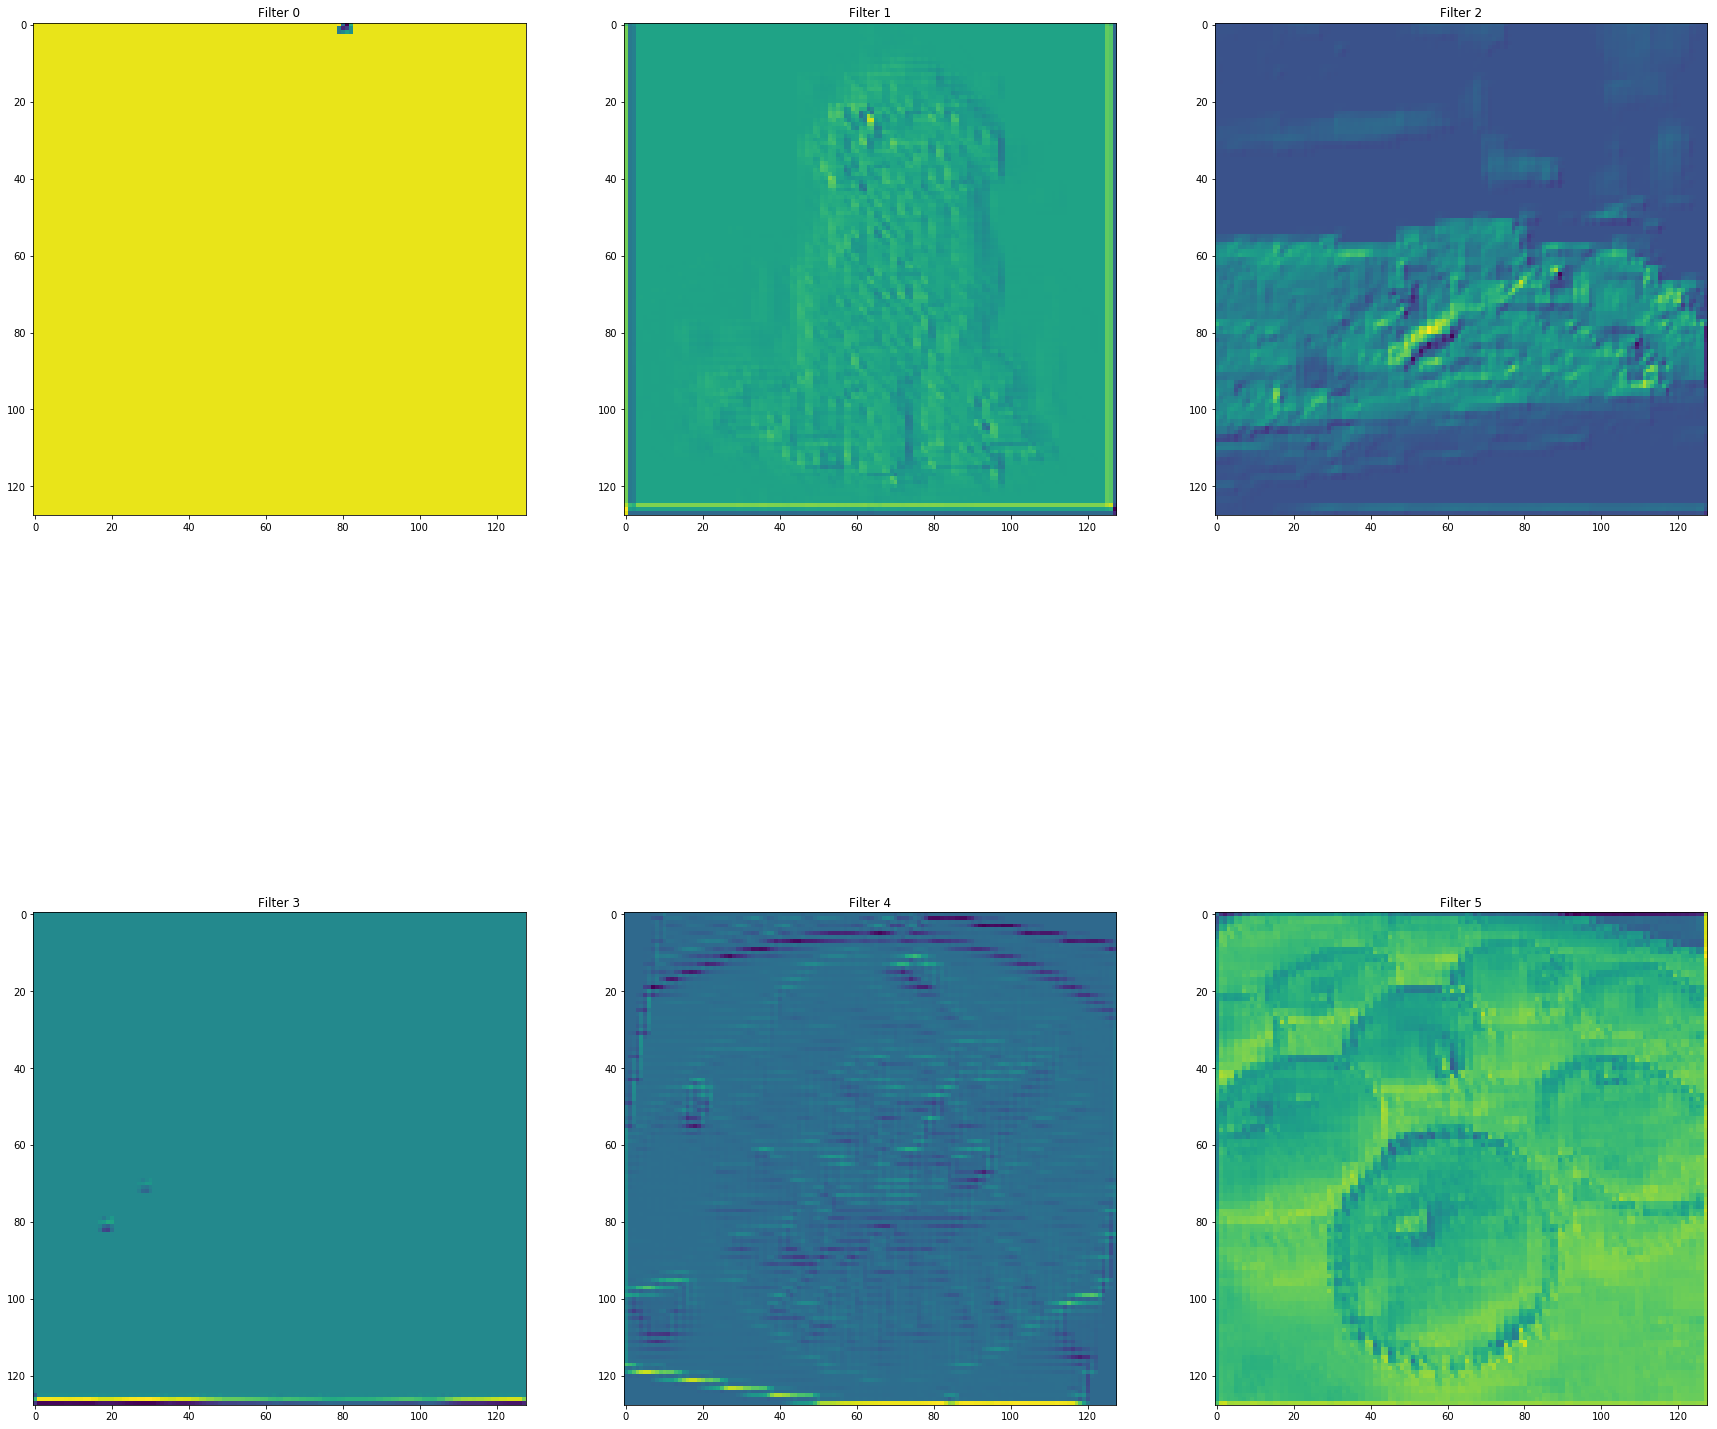

In [111]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 0, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

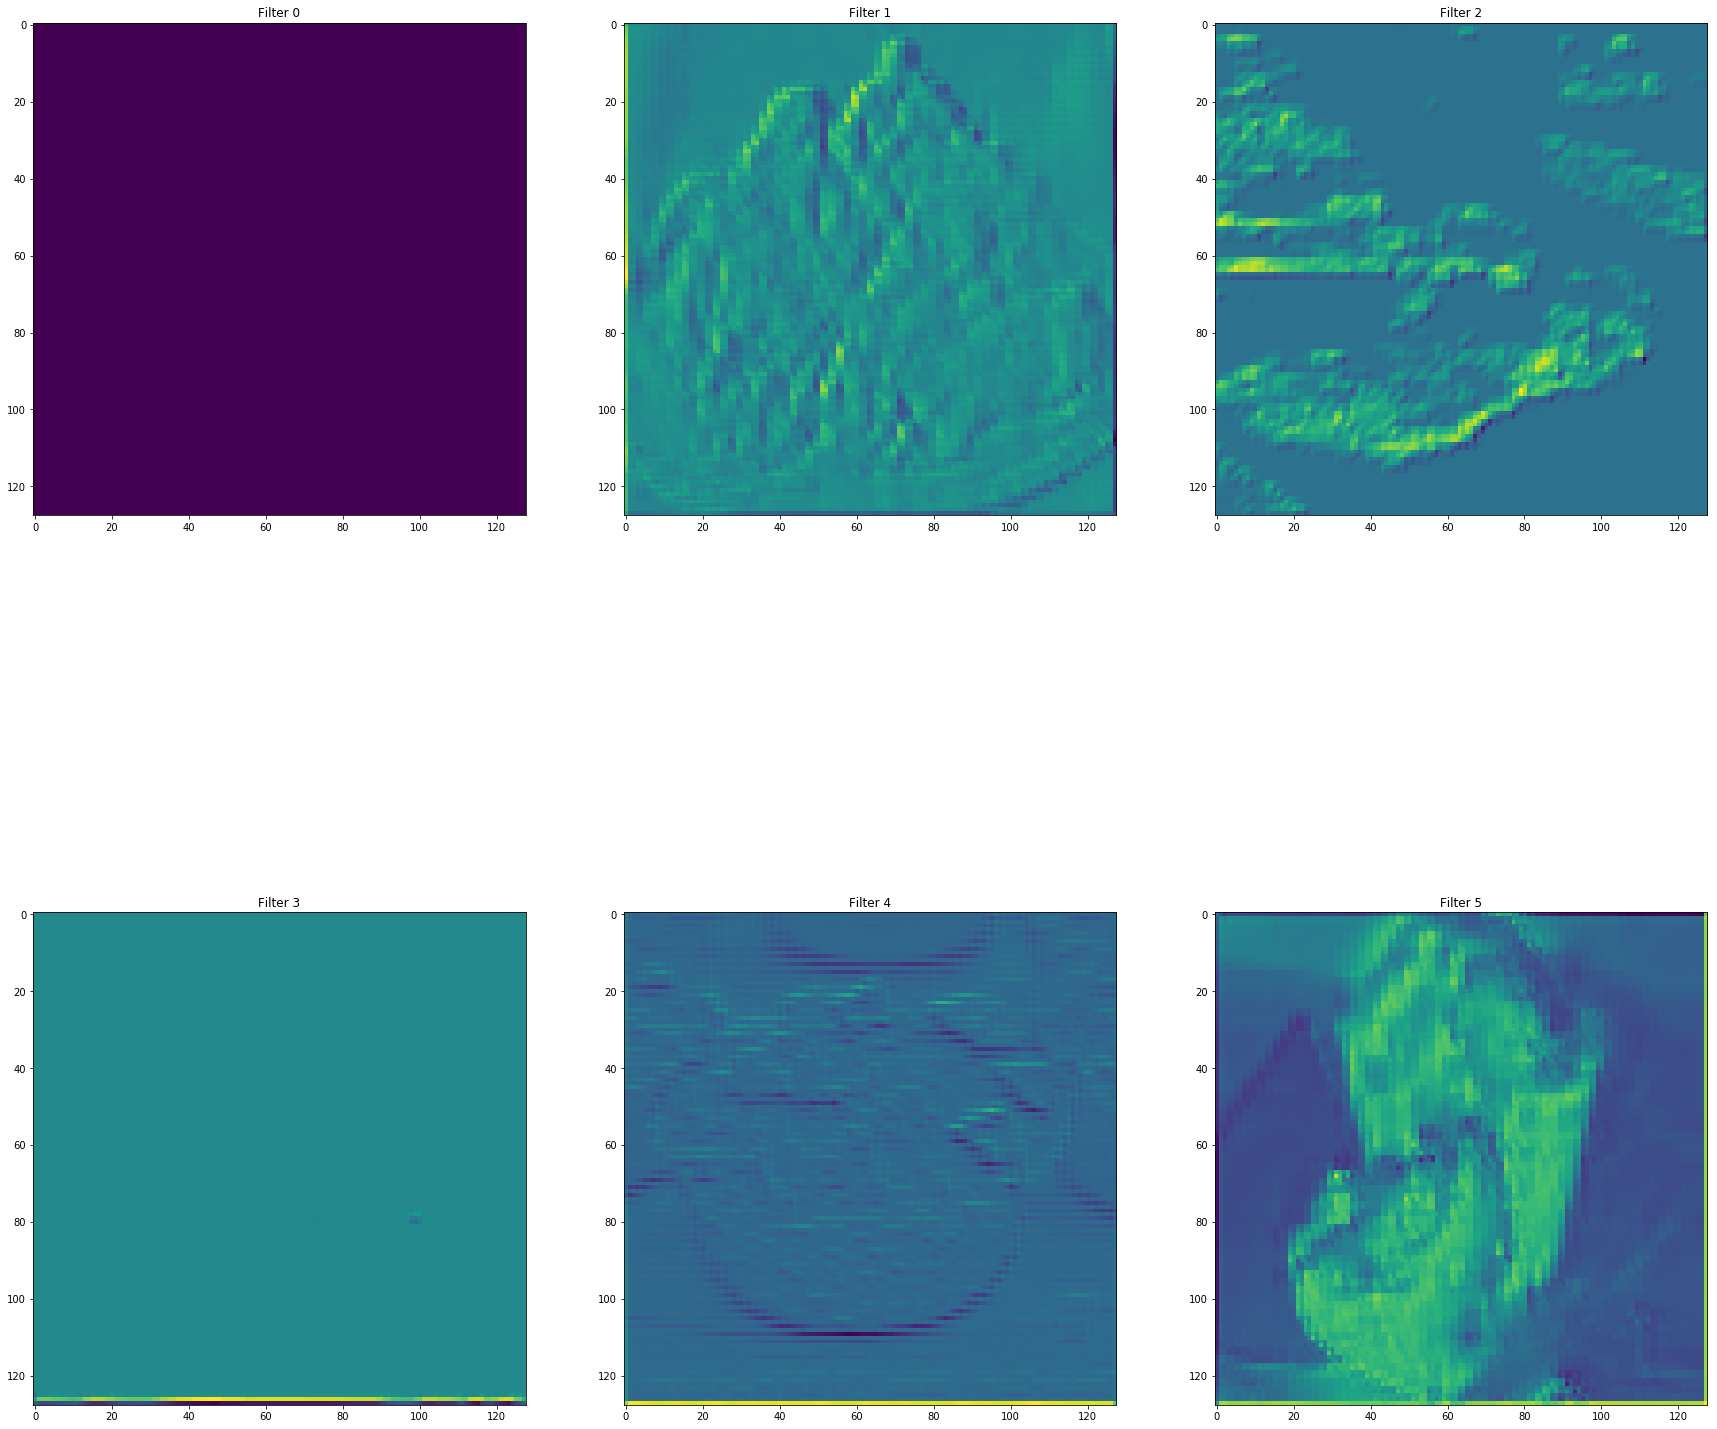

In [112]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 3, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

# Image action by random node:

In [113]:
subset = random.sample(range(Activations1.shape[0]), 2)
print("Selected nodes:", subset)

Selected nodes: [6, 1]


[  1.   2.  23.  27.  33.  46.  48.  59.  73.  84.]


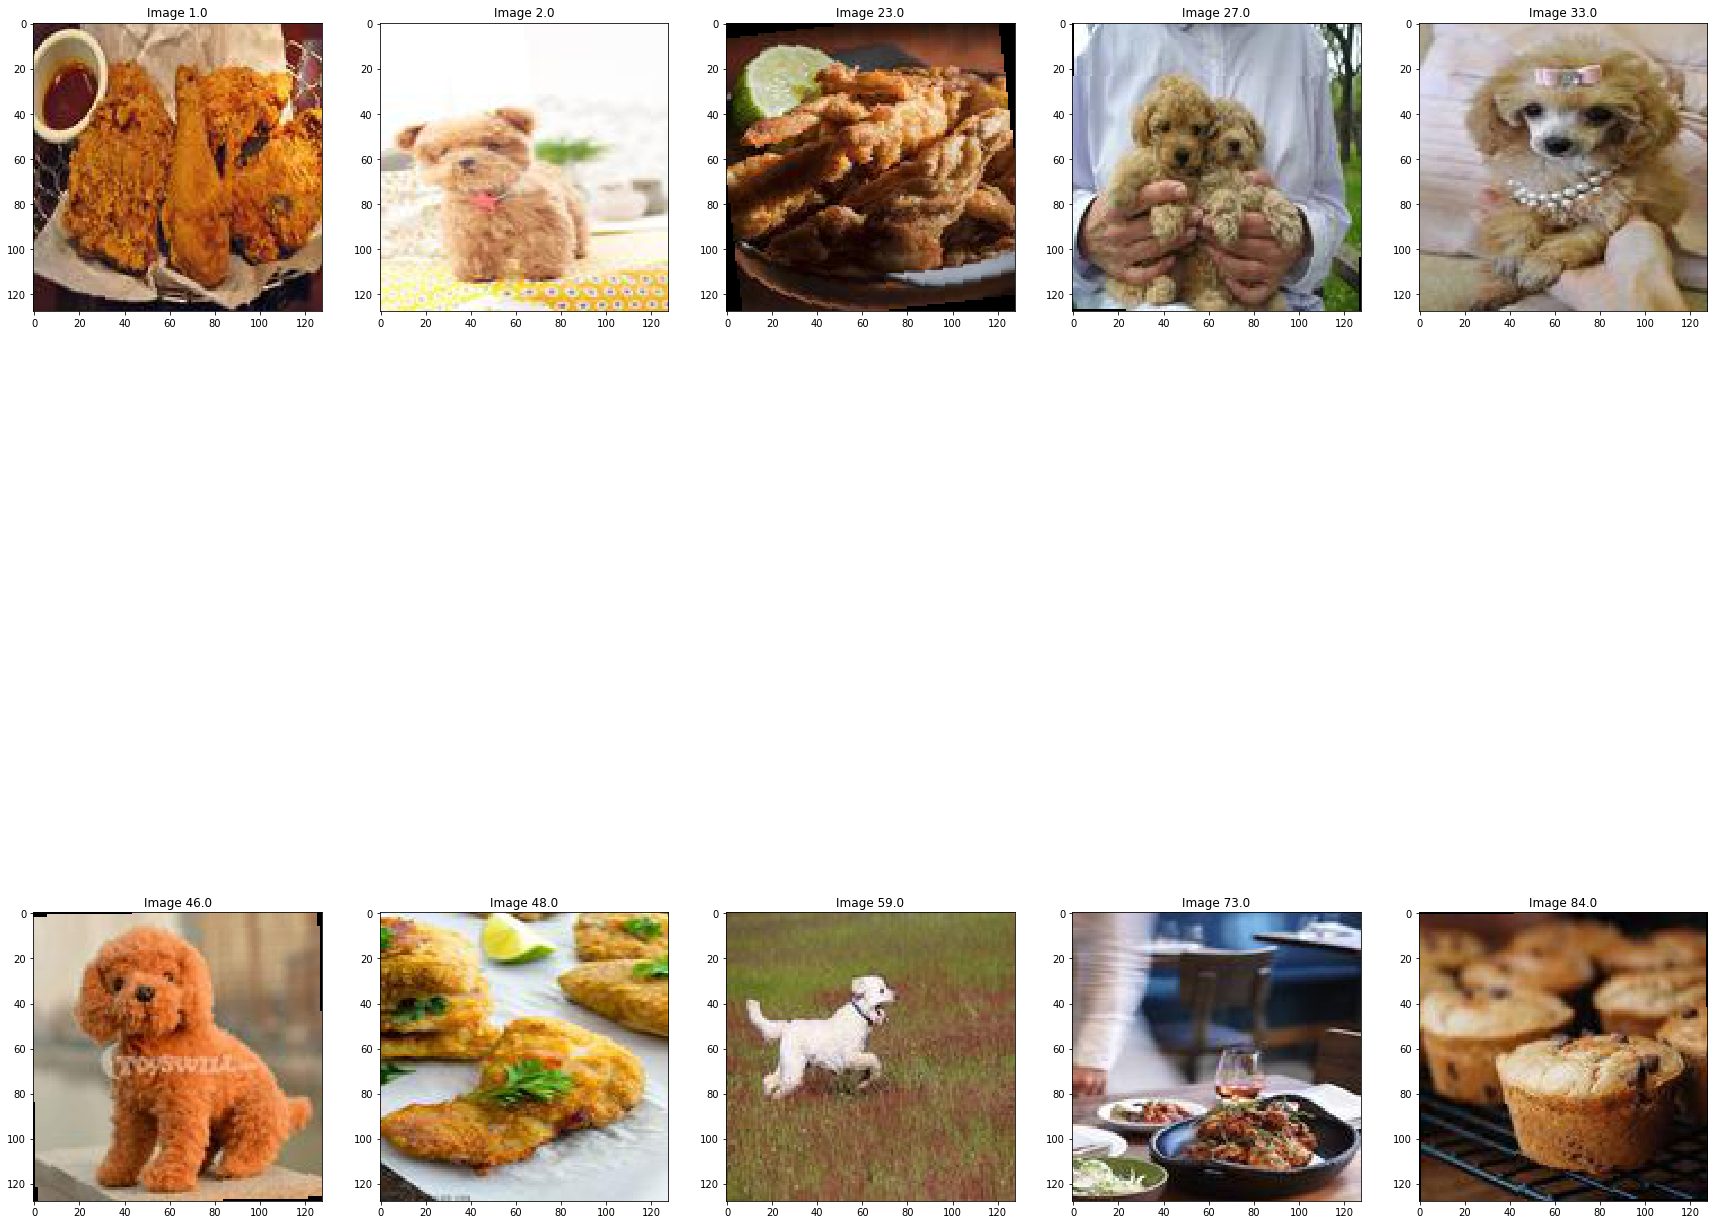

In [114]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[0],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_dmf[int(i), :, :, :], interpolation="nearest")
    j = j + 1

plt.show()

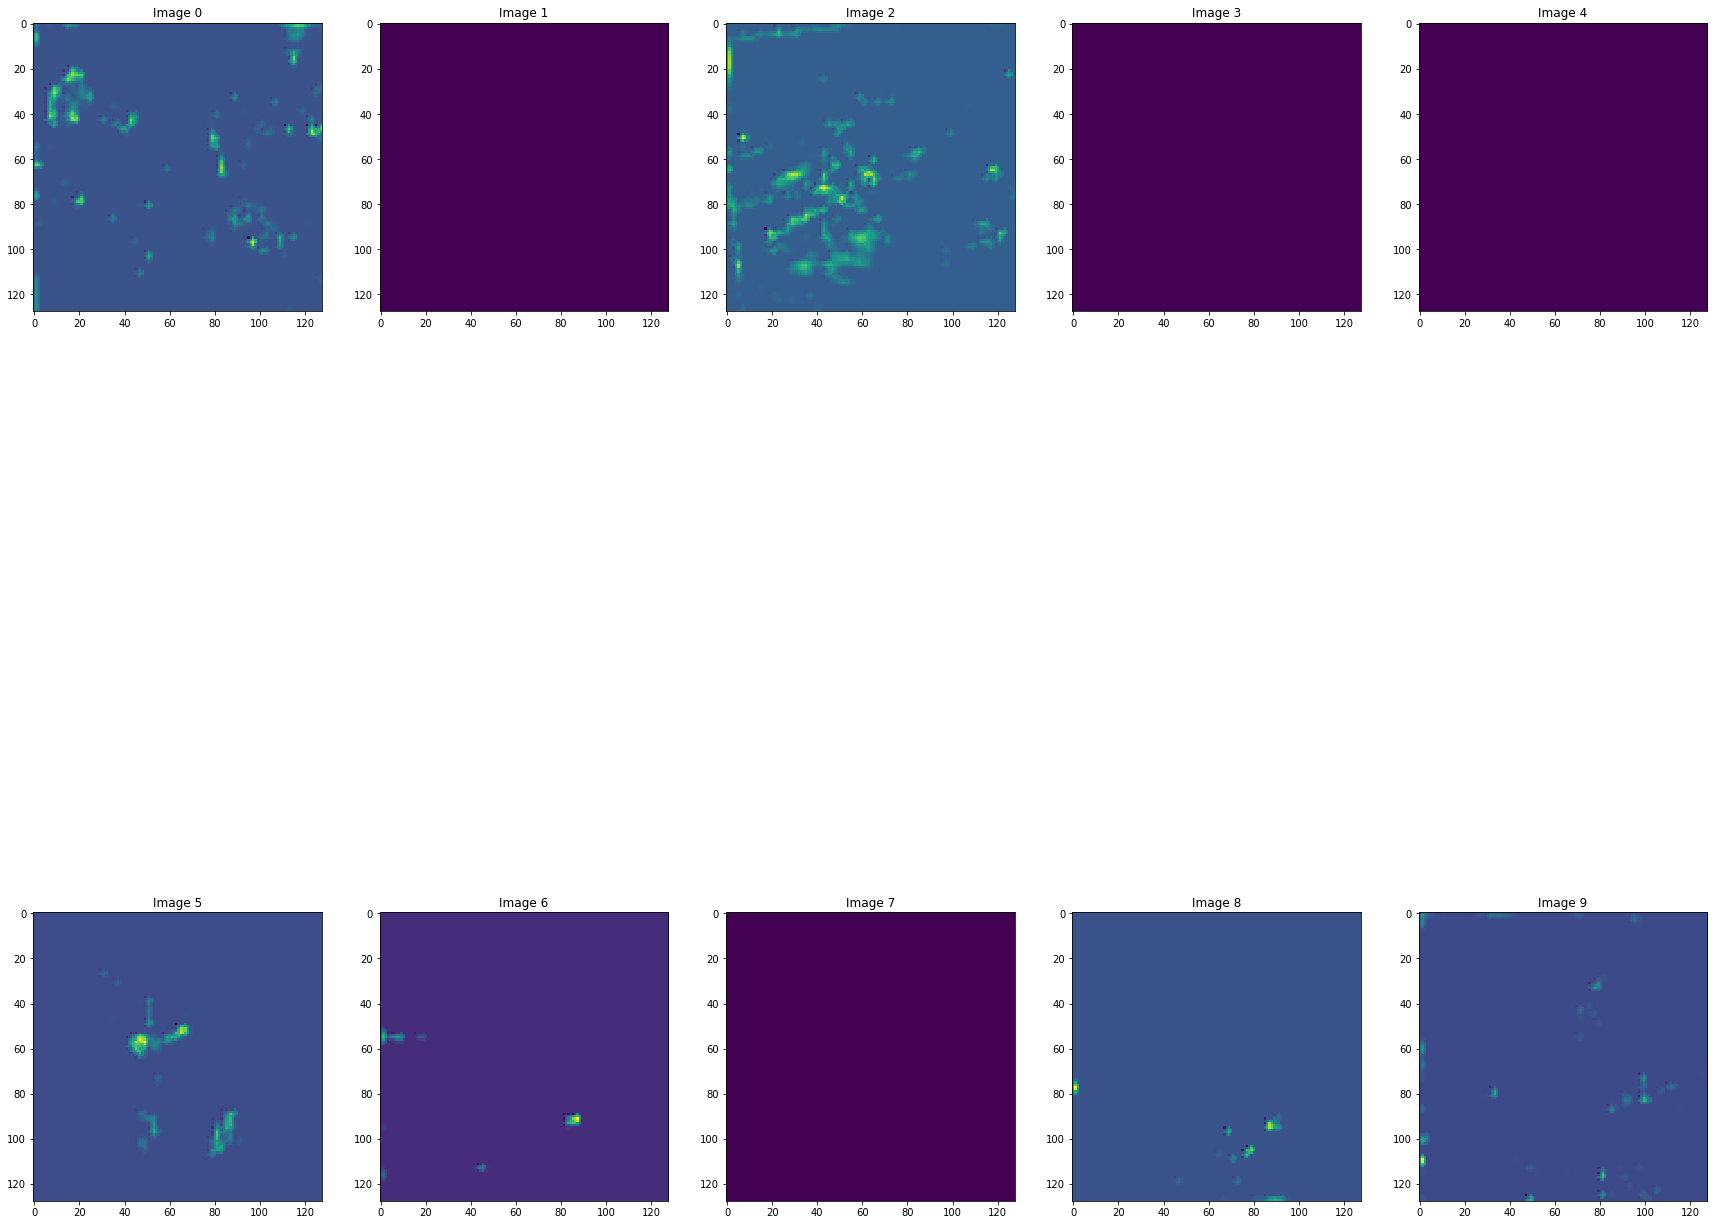

In [132]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[0], i, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

[  0.  25.  30.  34.  39.  47.  51.  67.  76.  81.]


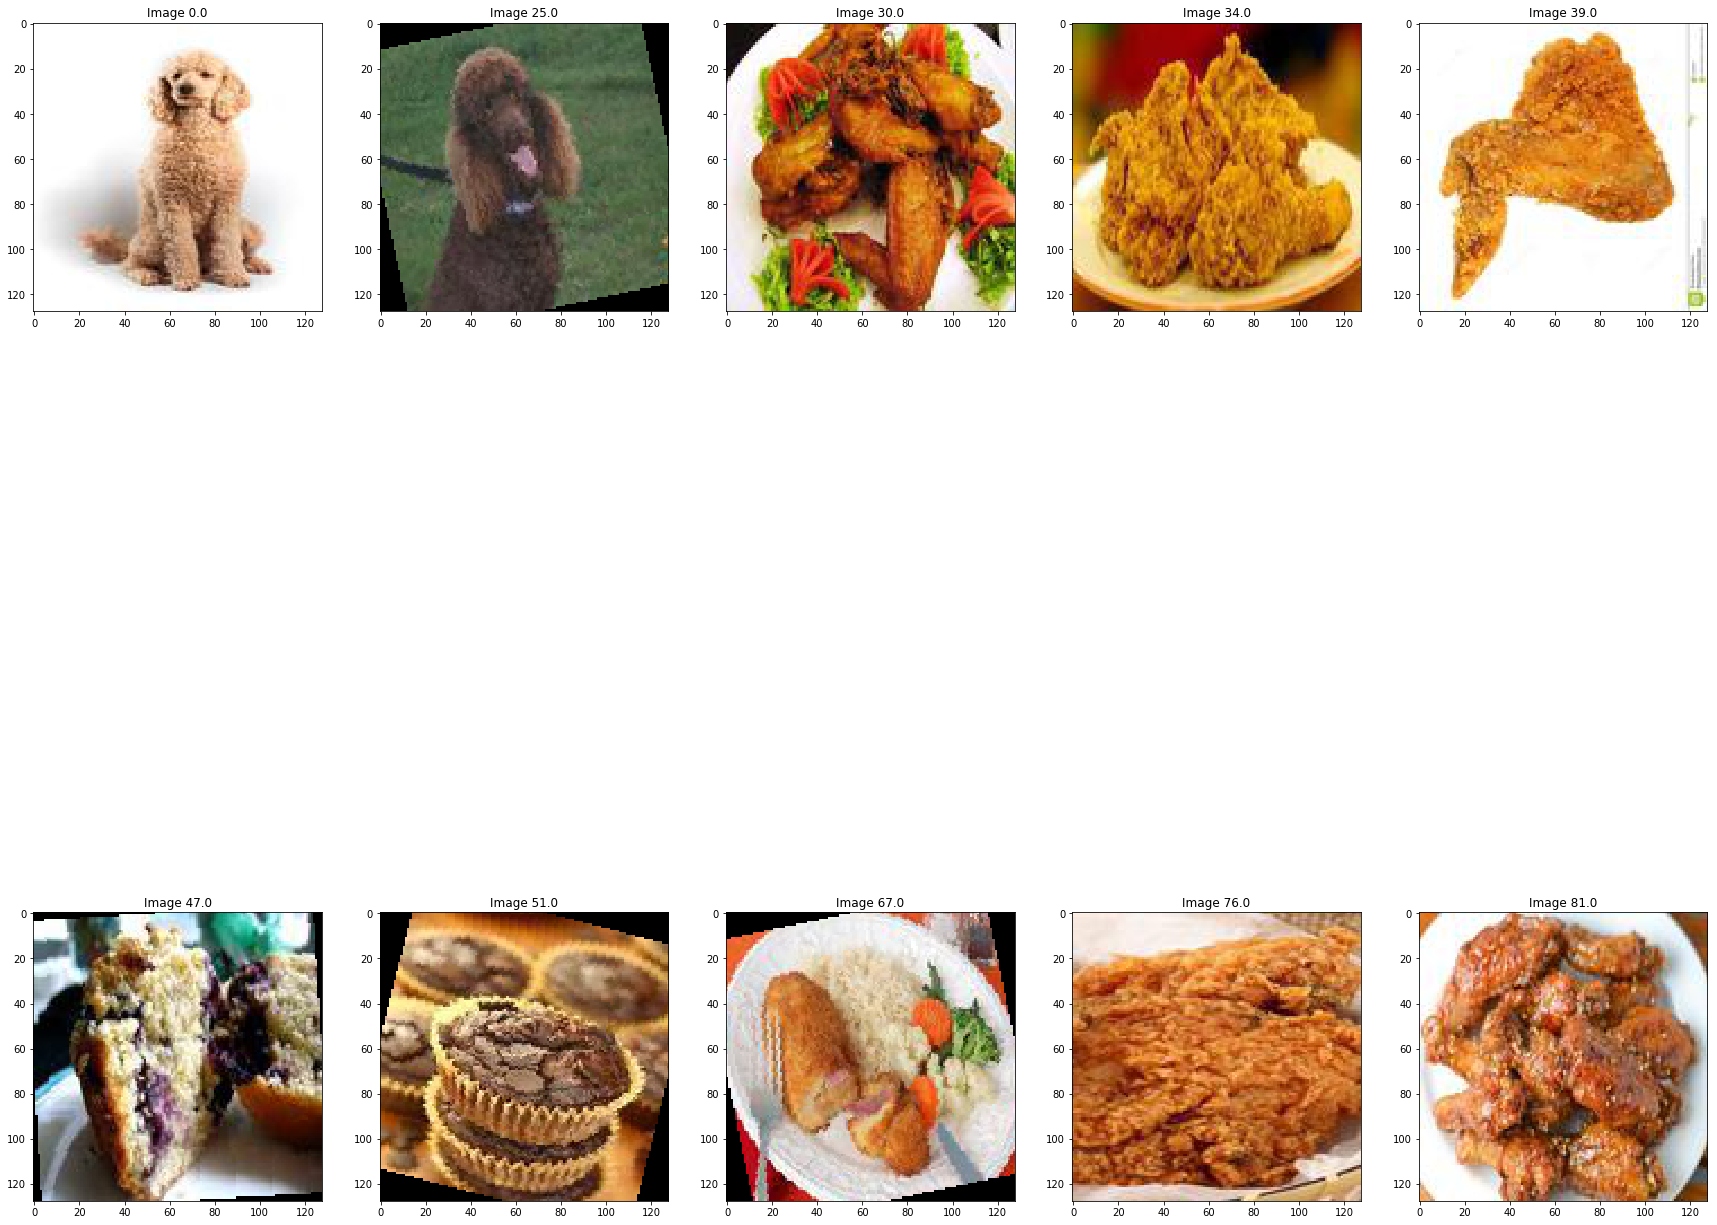

In [116]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[1],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_dmf[int(i), :, :, :], interpolation="nearest")
    j = j + 1

plt.show()

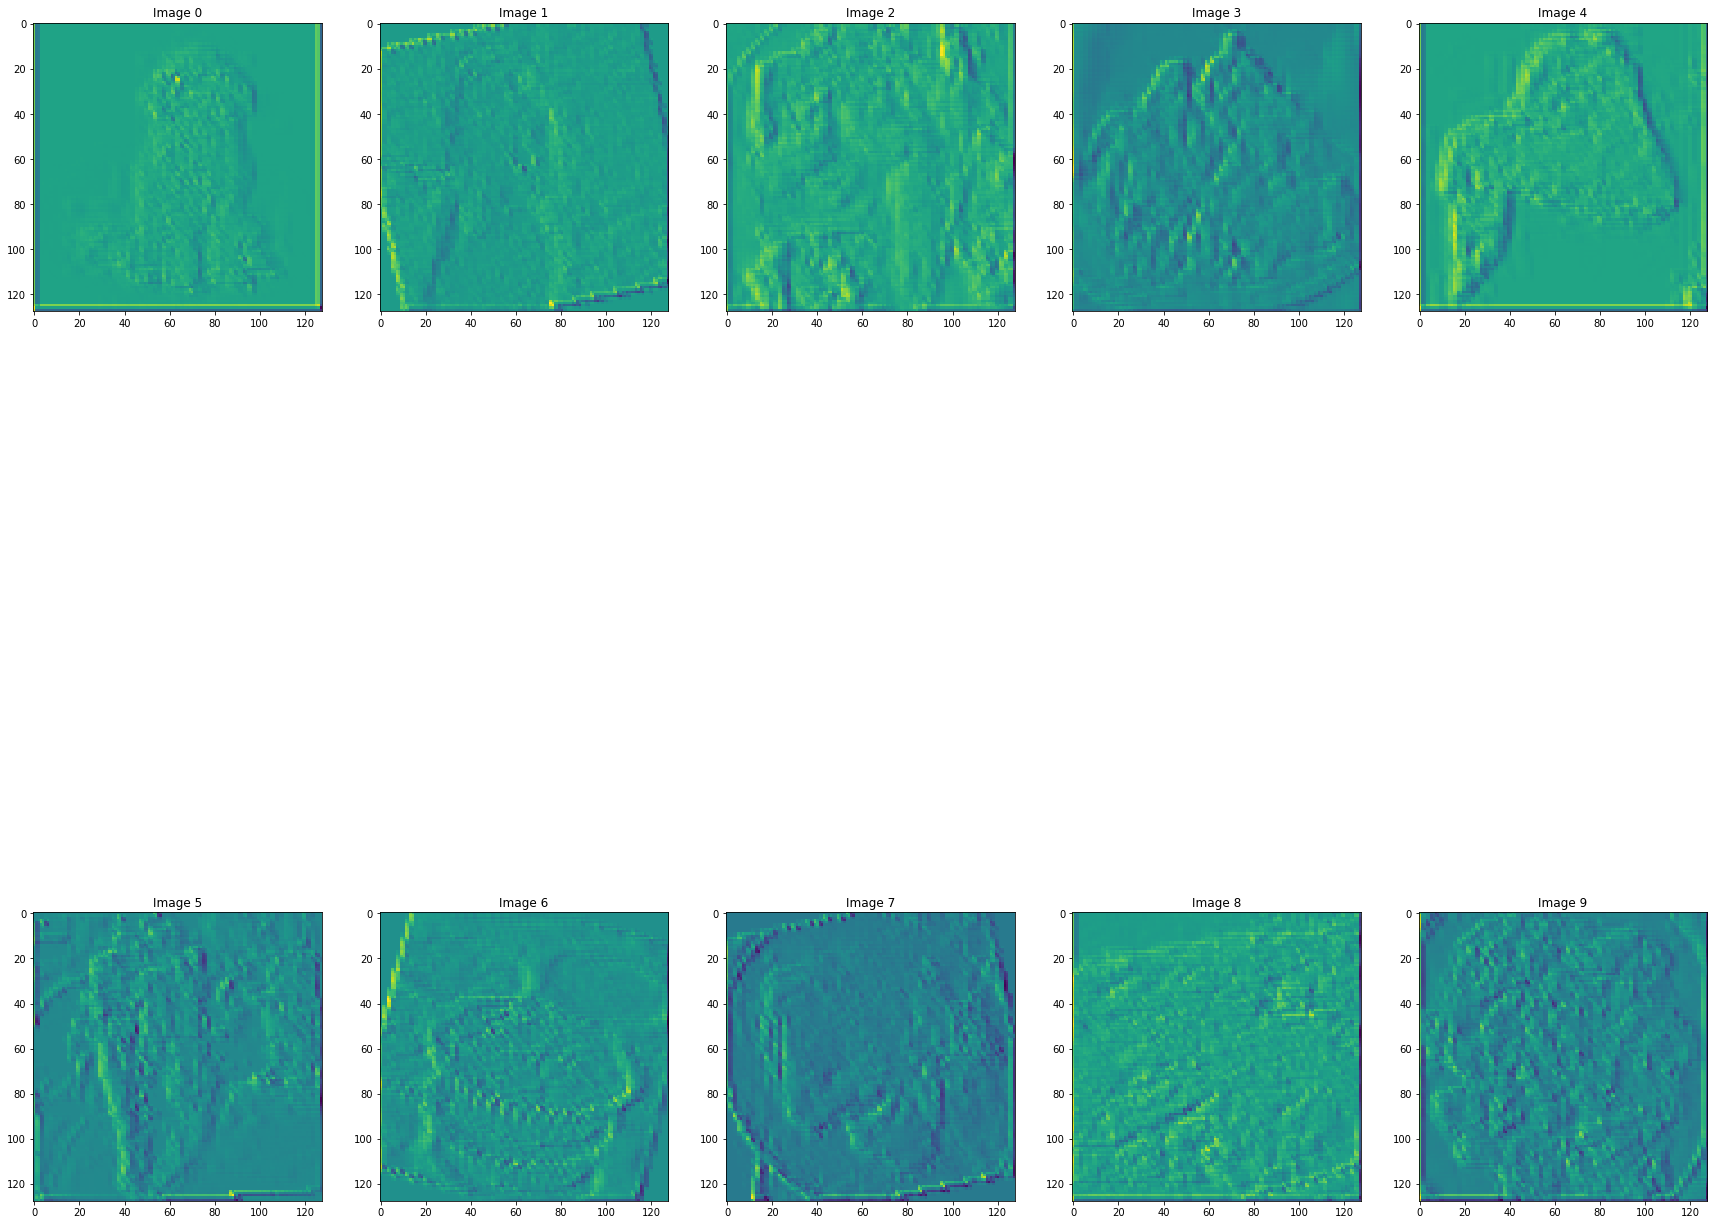

In [117]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[1], i, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()